In [141]:
import pandas as pd

In [182]:
data=pd.read_csv("/Users/abishekkumaryadav/DataScience/Machine_learning/mlops_implementation/gemstone.csv")
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [184]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [185]:
data.duplicated().sum()

0

In [186]:
data.size

2129303

In [187]:
categorical_data=data.columns[data.dtypes=='object']

In [188]:
data.drop('id', axis=1, inplace=True)

In [189]:
numerical_data=data.columns[data.dtypes!='object']

In [190]:
for cat in categorical_data: 
    print(data[cat].value_counts())

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64


In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [192]:
num_data=data[numerical_data]

In [193]:
# num_data

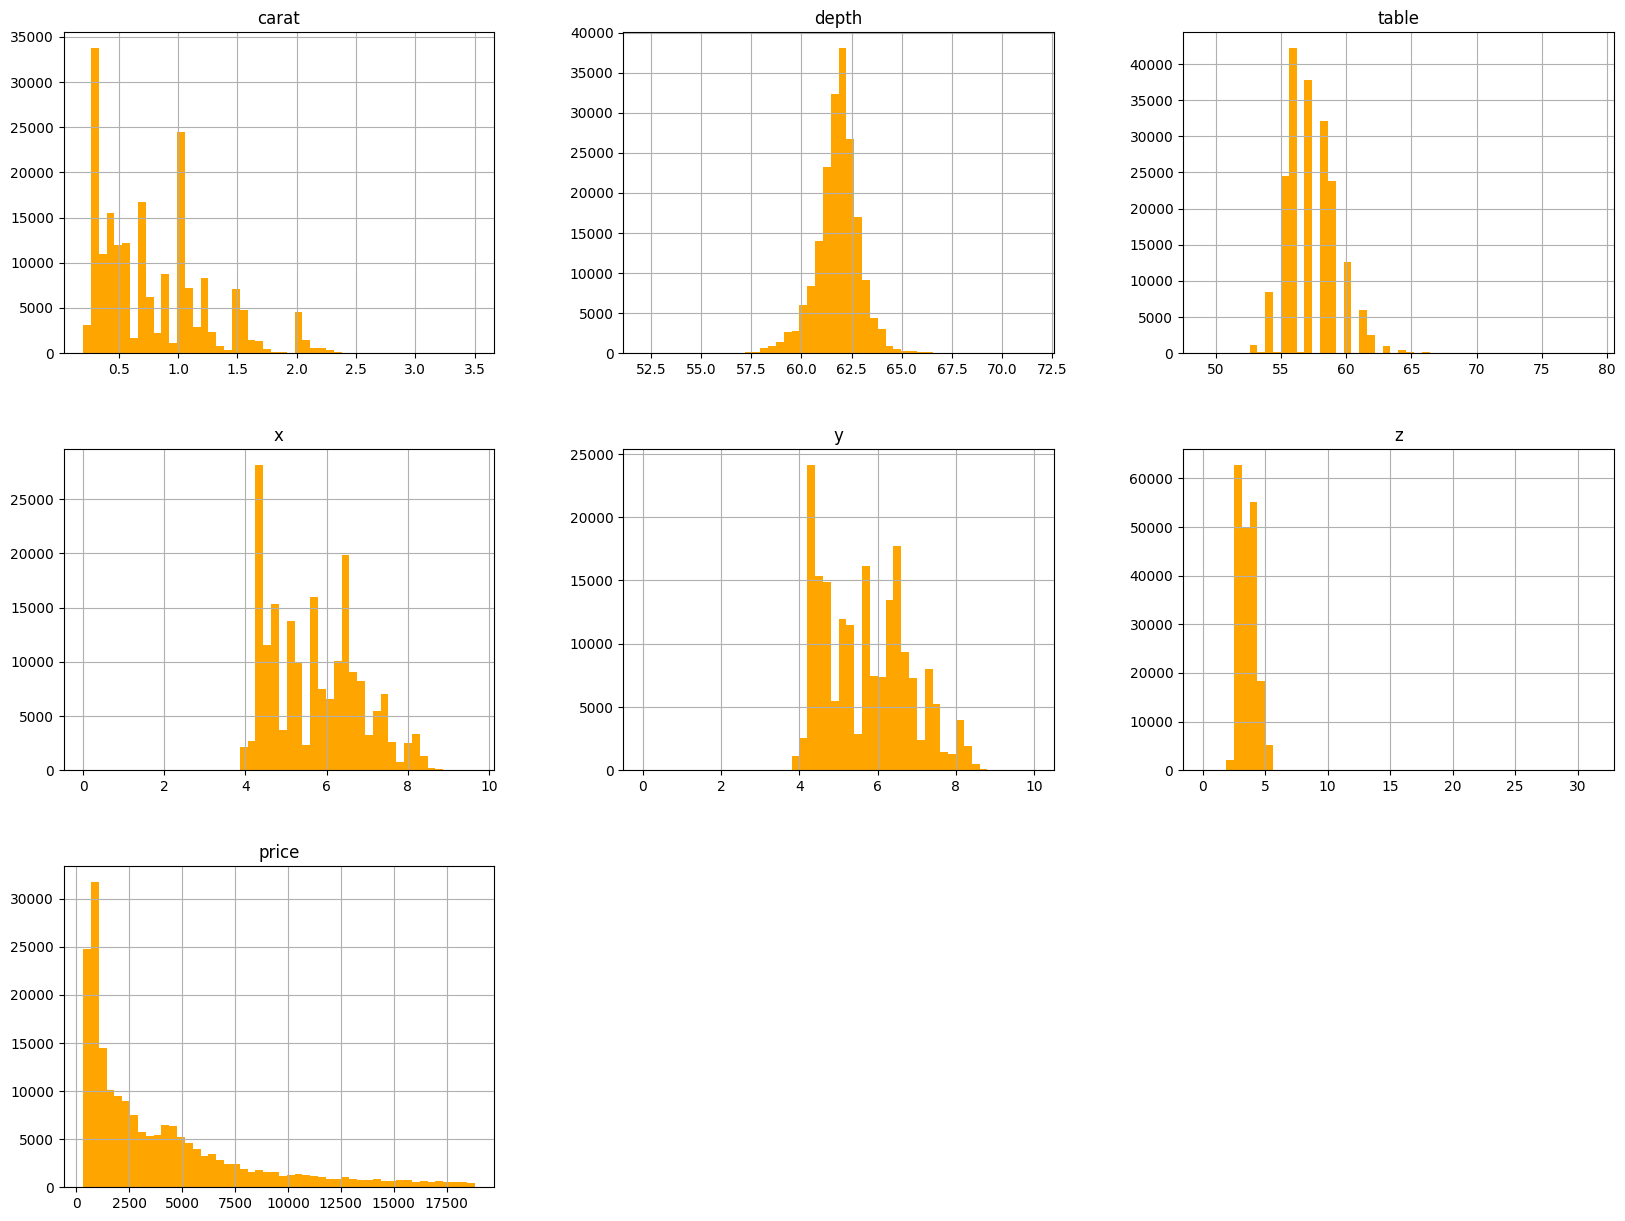

In [194]:
num_data.hist(bins=50, figsize=(20,15), color='orange')
plt.show()

In [195]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [157]:
data['cut']=data['cut'].map(cut_map)
data['clarity']=data['clarity'].map(clarity_map)
data['color']=data['color'].map(color_map)

In [158]:
data[['cut']]

,cut
0,4
1,3
2,5
3,5
4,4
...,...
193568,5
193569,4
193570,3
193571,3


In [196]:
from sklearn.impute import SimpleImputer # handling missing value
from sklearn.preprocessing import StandardScaler # Handling feature scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [197]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [198]:
# Seprating the dependent and independent variable from dataset.
x=data.iloc[:,:-1]
y=data['price']

In [199]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [200]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [201]:
categorical_col=['cut','color','clarity']
numerical_col=['carat', 'depth', 'table', 'x', 'y', 'z']

In [202]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [203]:
num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)


In [204]:
cat_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))

    ]
)


In [205]:
preprocessor=ColumnTransformer([
    ("numerical_pipeline", num_pipeline, numerical_col ),
    ("categorical_pipeline",cat_pipeline, categorical_col)
])

In [206]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]))]),
                                 ['cut', 'color', 'clarity'])])

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=42)

In [209]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
11504,0.41,Ideal,E,VVS2,60.6,56.0,4.85,4.80,2.93
95284,1.23,Very Good,H,VS1,59.9,59.0,6.91,7.01,4.19
184777,1.70,Premium,H,VS2,62.0,58.0,7.61,7.66,4.74
5419,0.33,Ideal,F,VVS1,61.2,56.0,4.47,4.44,2.73
45466,0.33,Very Good,I,SI1,62.1,58.0,4.41,4.45,2.75
...,...,...,...,...,...,...,...,...,...
119879,0.50,Very Good,E,SI1,60.2,61.0,5.11,5.15,3.09
103694,1.91,Very Good,F,SI1,62.3,62.0,7.85,7.79,4.87
131932,1.22,Premium,G,VS2,62.8,58.0,6.82,6.74,4.26
146867,0.31,Very Good,G,VVS1,61.1,56.0,4.37,4.40,2.67


In [210]:
x_train['cut'].value_counts()

cut
Ideal        64555
Premium      35157
Very Good    26204
Good          8155
Fair          1430
Name: count, dtype: int64

In [213]:
x_train_scaled=pd.DataFrame(preprocessor.fit_transform(x_train), columns=preprocessor.get_feature_names_out())
x_test_scaled=pd.DataFrame(preprocessor.fit_transform(x_test), columns=preprocessor.get_feature_names_out())

In [214]:
x_train_scaled

,numerical_pipeline__carat,numerical_pipeline__depth,numerical_pipeline__table,numerical_pipeline__x,numerical_pipeline__y,numerical_pipeline__z,categorical_pipeline__cut,categorical_pipeline__color,categorical_pipeline__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,4.0,1.0,5.0
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,2.0,4.0,4.0
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,3.0,4.0,3.0
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,4.0,2.0,6.0
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...
135496,-0.629077,-1.500179,1.964434,-0.546492,-0.518125,-0.644575,2.0,1.0,2.0
135497,2.411307,0.443325,2.485700,1.919078,1.872797,1.930288,2.0,2.0,2.0
135498,0.923460,0.906065,0.400636,0.992240,0.921862,1.047891,3.0,3.0,3.0
135499,-1.038774,-0.667249,-0.641897,-1.212375,-1.197364,-1.252127,2.0,3.0,6.0


In [215]:
x_test_scaled

,numerical_pipeline__carat,numerical_pipeline__depth,numerical_pipeline__table,numerical_pipeline__x,numerical_pipeline__y,numerical_pipeline__z,categorical_pipeline__cut,categorical_pipeline__color,categorical_pipeline__clarity
0,-0.626368,0.258533,-0.114042,-0.597859,-0.578700,-0.572348,4.0,0.0,2.0
1,2.633302,-2.139001,-0.114042,2.144241,2.217298,1.988647,2.0,3.0,1.0
2,-1.126185,-1.216872,0.927721,-1.376145,-1.416589,-1.479672,3.0,1.0,6.0
3,-1.017529,-0.571382,0.927721,-1.158949,-1.161580,-1.201621,3.0,5.0,6.0
4,0.873080,0.627385,-0.634923,0.958713,0.996895,1.022786,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
58067,0.264608,0.535172,0.927721,0.424772,0.377586,0.437416,2.0,5.0,1.0
58068,-0.604637,0.535172,-0.634923,-0.525460,-0.551378,-0.499177,4.0,0.0,3.0
58069,-0.821949,-0.018105,-0.634923,-0.833155,-0.861032,-0.850399,4.0,3.0,6.0
58070,0.916542,-0.663595,1.448603,1.058261,0.978680,0.949615,3.0,5.0,2.0


In [216]:
# Model training

In [218]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

In [219]:
models={
    'LinearRegression': LinearRegression(),
    'Lasson': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'xgbRegressor': XGBRegressor()

}

In [221]:
# models

In [223]:
list(models)

['LinearRegression', 'Lasson', 'Ridge', 'ElasticNet', 'xgbRegressor']

In [224]:
def model_evaluation(actual, predicted): 
    r2=r2_score(actual, predicted)
    mae=mean_absolute_error(actual, predicted)
    mse=mean_squared_error(actual, predicted)

    return r2, mae, mse

In [227]:
for i in range(len(list(models))):
    model=list(models.values())[i]

    model.fit(x_train_scaled, y_train)

    y_pred=model.predict(x_test_scaled)

    r2, mae, mse=model_evaluation(y_test, y_pred)

    print("model training performance")
    print("r2", r2)
    print("MAE", mae)
    print("MSE", mse)

    print("="*40)
    print("\n")




    

model training performance
r2 0.9362027871462387
MAE 679.7690381715854
MSE 1030893.6384406006


model training performance
r2 0.9362052955029703
MAE 681.1898158587051
MSE 1030853.1061213681


model training performance
r2 0.9362025033411446
MAE 679.8037450966242
MSE 1030898.2244225414


model training performance
r2 0.8596029776622165
MAE 1056.3975146157113
MSE 2268663.327280305


model training performance
r2 0.978647863195202
MAE 298.45279767411785
MSE 345027.3297931679


